In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2200562\AppData\local\Temp\ipykernel_9204\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [12]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

C:\Users\e2200562\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 13.1MB/s]

Extracting model files...
Path to dataset files: C:\Users\e2200562\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


Path to dataset files: C:\Users\r.bennetayeb\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [5]:
# Répertoire cible dans votre projet
project_dir = r"C:\SAE 601"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:\Users\e2200562\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1\ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\Users\\r.bennetayeb\\Desktop\\these\\Enseignement\\SAE_projet\\Data\\ds_salaries.csv'

In [3]:
# Répertoire cible dans votre projet
project_dir = r"C:\SAE 601"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:\Users\e2200562\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1\ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\SAE 601\\ds_salaries.csv'

In [6]:
df = pd.read_csv(r"C:\SAE 601\ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
#données manquantes 


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

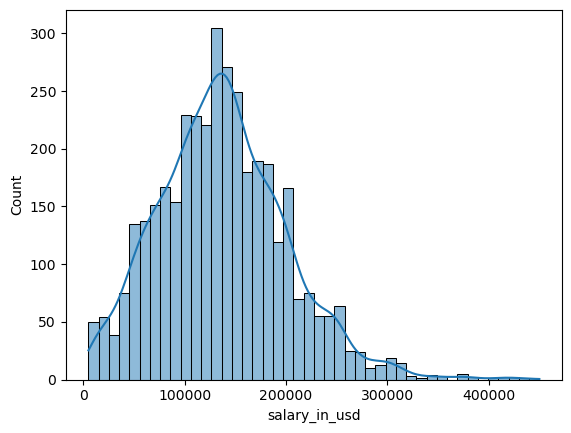

In [26]:
sns.histplot(data=df, x="salary_in_usd",  kde=True )
plt.show()

<IPython.core.display.Javascript object>


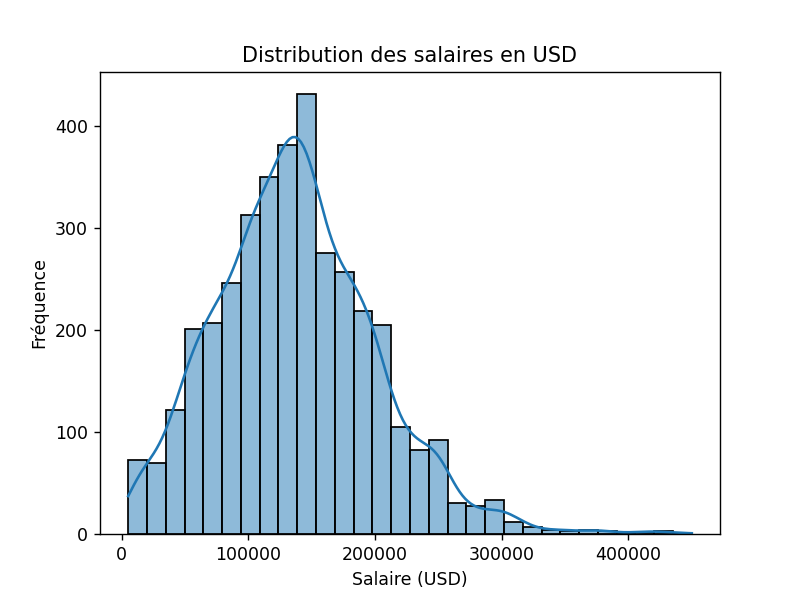

In [4]:
# Distribution des salaires en USD

In [32]:
print(df['employee_residence'].unique().tolist())

['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH', 'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG', 'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY', 'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE', 'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU', 'MT']


In [5]:
# liste des pays concerné par l'étude 

['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT', 'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK', 'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ', 'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT']


In [56]:
df.groupby('job_title').mean('salary_in_usd').sort_values(by = 'salary_in_usd', ascending=False).head(5)

,work_year,salary,salary_in_usd,remote_ratio
job_title,,,,
Data Science Tech Lead,2022.00,375000.0,375000.000,50.0
Cloud Data Architect,2021.00,250000.0,250000.000,50.0
Data Lead,2023.00,212500.0,212500.000,0.0
Data Analytics Lead,2022.50,922500.0,211254.500,75.0
Principal Data Scientist,2021.25,190875.0,198171.125,87.5


In [55]:
df.groupby('employee_residence').mean('salary_in_usd').sort_values(by = 'salary_in_usd', ascending=False).head(5)

,work_year,salary,salary_in_usd,remote_ratio
employee_residence,,,,
IL,2023.000000,1.500000e+06,423834.000000,0.000000
MY,2022.000000,2.000000e+05,200000.000000,100.000000
PR,2021.800000,1.660000e+05,166000.000000,90.000000
US,2022.474368,1.528220e+05,152822.011651,43.924767
CA,2022.282353,1.402824e+05,132222.905882,60.000000


In [57]:
df.groupby('experience_level').mean('salary_in_usd').sort_values(by = 'salary_in_usd', ascending=False).head(5)

,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EX,2022.385965,246802.201754,194930.929825,48.245614
SE,2022.468203,170048.965421,153051.071542,45.071542
MI,2022.203727,248200.306832,104525.939130,46.211180
EN,2022.053125,188381.178125,78546.284375,55.156250


In [8]:
#Salaire moyen par rôle


# Salaire moyen par pays


# Salaires moyens par niveau d'expérience


job_title
Data Science Tech Lead      375000.000
Cloud Data Architect        250000.000
Data Lead                   212500.000
Data Analytics Lead         211254.500
Principal Data Scientist    198171.125
Name: salary_in_usd, dtype: float64
employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
          ...      
MD     18000.000000
ID     15000.000000
SK     12608.000000
MA     10000.000000
MK      6304.000000
Name: salary_in_usd, Length: 78, dtype: float64
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [62]:
#df.filter("company_location" == 'US')

df[df['company_location'] == 'US']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [9]:
# Filtrer les salaires pour un pays donné (ex : US)


      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [64]:
df.groupby('company_location').mean('salary_in_usd').sort_values(by = 'salary_in_usd', ascending=False).head(5)

,work_year,salary,salary_in_usd,remote_ratio
company_location,,,,
IL,2022.000000,830000.000000,271446.500000,50.000000
PR,2022.000000,167500.000000,167500.000000,100.000000
US,2022.463158,157665.357566,151822.009539,44.440789
RU,2021.333333,140333.333333,140333.333333,16.666667
CA,2022.241379,139908.045977,131917.689655,59.770115


In [10]:
# Top 5 des entreprises qui paient le plus

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64

In [83]:
df[['job_title','salary_in_usd']].groupby('job_title').mean('salary_in_usd').query("salary_in_usd > 100000").sort_values(by = 'salary_in_usd', ascending=False)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Data Science Manager,191278.775862


In [93]:
df[df['remote_ratio'] == 100].groupby(['employee_residence']).count().sort_values('remote_ratio', ascending=False)['remote_ratio']

employee_residence
US    1302
GB      61
CA      45
IN      39
ES      25
DE      17
BR      16
FR      15
GR      12
MX       9
PT       8
NL       8
AR       6
PL       6
AU       6
PK       5
NG       5
PR       4
IE       3
IT       3
SI       3
BE       3
PH       2
JP       2
RU       2
KE       2
SG       2
AE       2
VN       2
CF       2
CL       2
CH       2
BO       2
SE       1
UZ       1
AT       1
UA       1
TR       1
TN       1
TH       1
SK       1
BG       1
HU       1
LU       1
RS       1
CO       1
CZ       1
DO       1
EE       1
EG       1
MY       1
HR       1
IR       1
Name: remote_ratio, dtype: int64

In [18]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)


Rôles avec un salaire moyen > 100,000 USD : job_title
AI Developer                                136666.090909
AI Scientist                                110120.875000
Analytics Engineer                          152368.631068
Applied Data Scientist                      113726.300000
Applied Machine Learning Scientist          109452.833333
Applied Scientist                           190264.482759
BI Analyst                                  104888.888889
BI Developer                                129846.153846
Big Data Architect                          125802.500000
Business Intelligence Engineer              174150.000000
Cloud Data Architect                        250000.000000
Cloud Database Engineer                     155000.000000
Computer Vision Engineer                    143536.111111
Data Analyst                                108716.227124
Data Analytics Lead                         211254.500000
Data Analytics Manager                      141879.090909
Data Architect    

In [98]:
df[df['remote_ratio'] == 100]['salary_in_usd'].mean()

136481.45283018867

In [118]:
print(df.query('experience_level == "SE" and job_title == "Data Scientist"')['salary_in_usd'].mean())
df.query('experience_level == "SE" and job_title == "Data Scientist Lead"')['salary_in_usd'].mean()

158990.9605263158


183000.0

In [12]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# Comparer salaires moyens pour deux catégories



Salaire moyen des employés à distance : 136481.45283018867
Salaire moyen (tech) : 143629.96173351776
Salaire moyen (non-tech) : nan


In [123]:
fourch = [0, 50000, 100000, 150000, float('inf')]
labels = ['<50K', '50K-100K', '100K-150K', '150K+']

# Ajout de la colonne "salary_range"
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=fourch, labels=labels)
df[['salary_range','salary_in_usd']]

,salary_range,salary_in_usd
0,50K-100K,85847
1,<50K,30000
2,<50K,25500
3,150K+,175000
4,100K-150K,120000
...,...,...
3750,150K+,412000
3751,150K+,151000
3752,100K-150K,105000
3753,50K-100K,100000


In [16]:
# Ajouter une colonne pour les fourchettes de salaires



Données avec fourchettes de salaires :    salary_in_usd salary_range
0          85847     50k-100k
1          30000         <50k
2          25500         <50k
3         175000        150k+
4         120000    100k-150k
Pays avec les salaires moyens les plus élevés : employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
Name: salary_in_usd, dtype: float64


In [126]:
# Analyse des corrélations
# Relation entre télétravail et salaire
df[['remote_ratio','salary_in_usd']].corr(method="pearson")

,remote_ratio,salary_in_usd
remote_ratio,1.000000,-0.064171
salary_in_usd,-0.064171,1.000000


Le télétravail n'influence pas le salaire 

In [129]:
# Salaire moyen par taille d'entreprise
df.groupby('company_size').mean('salary_in_usd')

,work_year,salary,salary_in_usd,remote_ratio
company_size,,,,
L,2021.775330,438794.372247,118300.982379,60.572687
M,2022.501110,150712.836029,143130.548367,42.990802
S,2021.493243,281430.101351,78226.682432,72.297297


In [133]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = pd.pivot_table(df,
    index= 'experience_level' ,
    columns='remote_ratio',
    values='salary_in_usd', 
    aggfunc='mean'
)
print("Tableau croisé des salaires :", pivot_table)

Tableau croisé des salaires : remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381


Le niveau d'expérience impacte grandement le salaire et le télétravail également différament selon l'expérience un senior aura très peux de différence entre le télétrail a plein temps et le présentiel mais si il travail 50/50 alors cela impacte grandement le salaire pareil pour MI ou EX